Hello visitors, welcome again to my chain of notebooks on my learning process of Artificial Intelligence course by Professor Nguyen Truong Thinh.\
In this notebook, I am working on the topic of determining whether a user purchased a particular product (by looking at a particular advertisement of it)\
**Dataset link:** https://www.kaggle.com/datasets/rakeshrau/social-network-ads

In [ ]:
# Import libraries
import pandas as pd               # Pandas for Dataframe processing
import numpy as np                # Numpy for matrix computations
import matplotlib.pyplot as plt   # Matplot for visualizing data
import seaborn as sns             # Seaborn for the machine learning - oriented visualization
from sklearn import linear_model  # Scikit-learn Linear Regression

In [ ]:
# Read data from file
file_path = '/content/Social_Network_Ads.csv'
socialnetads_dataframe = pd.read_csv(file_path).sample(frac = 1)   # Read .csv from file path

# Using .head() for review some first data
socialnetads_dataframe.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
205,15766609,Female,47,47000,0
304,15598070,Female,40,60000,0
321,15611191,Female,53,82000,1
0,15624510,Male,19,19000,0
45,15639277,Male,23,20000,0


In [ ]:
# More on data
socialnetads_dataframe.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
# Data information
socialnetads_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 205 to 183
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 18.8+ KB


**COMMENT 01:**

As described, the dataset contains 400 instances with 5 categories on each consisting: User ID, Gender, Age, Estimated Salary and Purchased (in Binary Logic)

<AxesSubplot:>

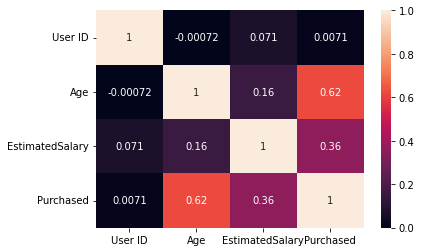

In [ ]:
# Let's look at data correlation
correlation = socialnetads_dataframe.corr()
sns.heatmap(correlation, annot = True)

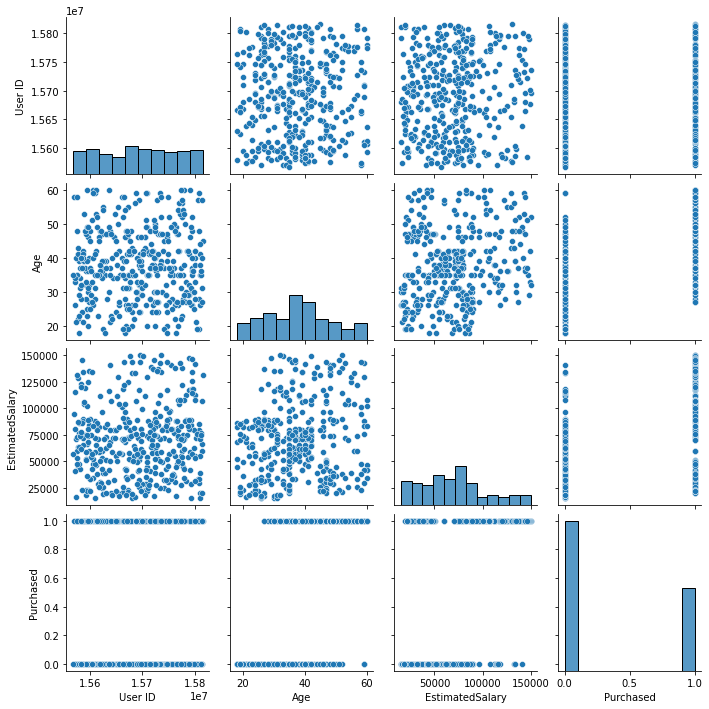

In [ ]:
# And, maybe looking at plots help it clearer
sns.pairplot(socialnetads_dataframe)

**COMMENT 02:**

Yep, nothing has been cleared even when their relations are plotted in pair. Moreover, the User ID relation respecting to the others shows no meaning.\
What about the numeric data of salaries and ages? I think using them as a regression task is not proper, since there may be the other age values with specific salary levels. In conclusion, a classification whether an age value with a particular salary would belong to purchased or not.

In [ ]:
# Extract only needed categories from dataframe
est_salary = pd.DataFrame(socialnetads_dataframe['EstimatedSalary'])    # Estimated Salary
age_data   = pd.DataFrame(socialnetads_dataframe['Age'])                # Users' Ages
purchased  = pd.DataFrame(socialnetads_dataframe['Purchased'])          # Purchased or not

# Turn into Numpy array for easily handling
est_salary_arr = np.array(est_salary)
age_data_arr   = np.array(age_data)
purchased_arr  = np.array(purchased)

In [ ]:
# Separating classes of: Purchased (encoded 1) and Not purchased (encoded 0)
purchased_idx   = np.where(purchased_arr==1)  # Indices of 'purchased'
nopurchased_idx = np.where(purchased_arr==0)  # Indices of 'not purchased'

# Create new arrays for each class
est_salary_purchased = est_salary_arr[purchased_idx]       # Of class 'Purchased'
age_data_purchased   = age_data_arr[purchased_idx]

est_salary_nopurchased = est_salary_arr[nopurchased_idx]   # Of class 'Not Purchased'
age_data_nopurchased   = age_data_arr[nopurchased_idx]

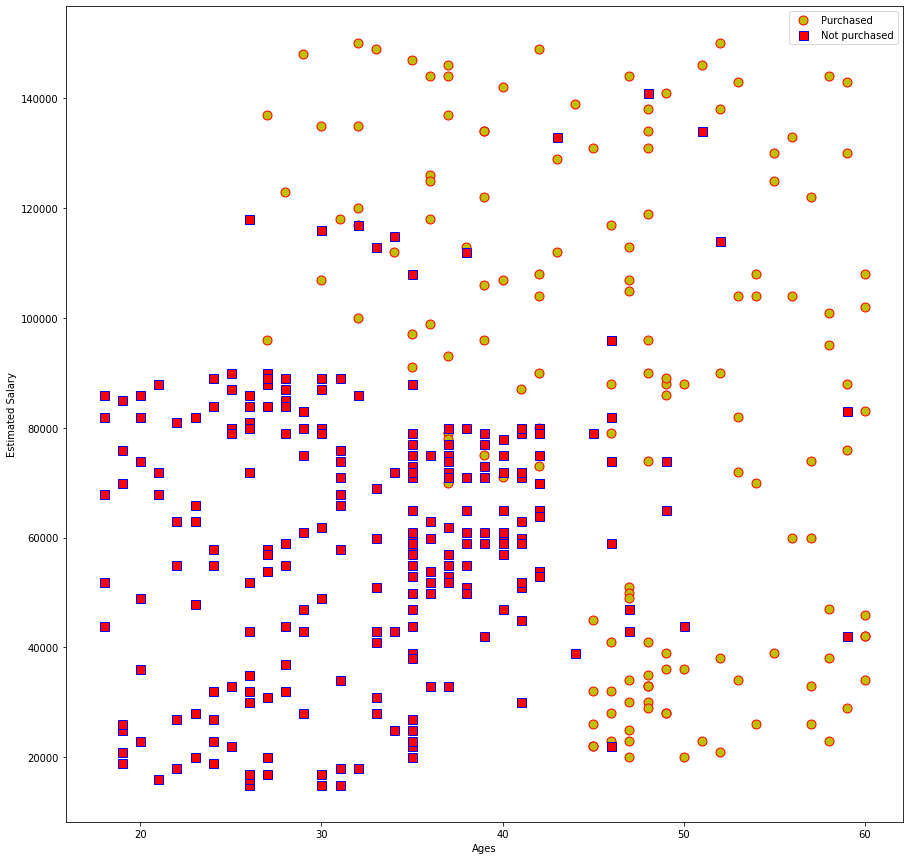

In [ ]:
# Scatter them in clusters
plt.figure(figsize = [15, 15])     # Create a figure with size dimension
plt.plot(age_data_purchased, est_salary_purchased, 'yo', mec = 'r', ms = 9.0)
plt.plot(age_data_nopurchased, est_salary_nopurchased, 'rs', mec = 'b', ms = 9.0)
plt.legend(['Purchased', 'Not purchased'])
plt.xlabel('Ages')
plt.ylabel('Estimated Salary')
plt.show()

**COMMENT 3:**

This time, data is visualized in better way with markers and based on two significant numeric data

Since the correlation between age and purchasing ability is significant and the highest while the correlation between age-salary, salary-purchasing ability is close to 0, rather than over 0.5. Thus, logistic regression should be use in this case.

In [ ]:
# Train a Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# The dataset
x_set = pd.DataFrame([socialnetads_dataframe['Age']]).T
y_set = pd.DataFrame(socialnetads_dataframe['Purchased'])

# Turn into array
x_set = np.array(x_set)
y_set = np.array(y_set).reshape(400, )

# Creat model and train
log_reg = LogisticRegression()
log_reg.fit(x_set, y_set)

LogisticRegression()

In [ ]:
import random

# Make random prediction
random_idx = random.randint(1, 400)
x_random   = x_set[random_idx]
print("Chosen age:", x_random)

Chosen age: [58]


In [ ]:
# Make prediction
print("Predicted ability:")
log_reg.predict([x_random])

Predicted ability:


array([1])

In [ ]:
# True value
print("True value:", y_set[random_idx])

True value: 1


**DECISION BOUNDARY**

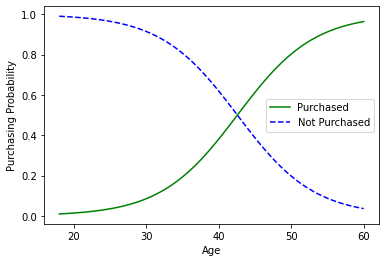

In [ ]:
# Estimating the probs of purchased or not - based on Age
x_new = np.linspace(np.amin(age_data_arr), np.amax(age_data_arr), 100).reshape(-1, 1)
y_proba = log_reg.predict_proba(x_new)

plt.plot(x_new, y_proba[:, 1], "g-")
plt.plot(x_new, y_proba[:, 0], "b--")
plt.legend(["Purchased", "Not Purchased"])
plt.xlabel('Age')
plt.ylabel('Purchasing Probability')
plt.show()